In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from bs4 import BeautifulSoup
import math
from stop_words import get_stop_words


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron


from utilidades.validar import validar
from utilidades.reducir_uso_memoria import reduce_mem_usage
from utilidades.dolarizar import dolarizar
from utilidades.dolarizar import desdolarizar
from utilidades.dolarizar import agregar_dolar_como_feature
from utilidades.generar_submit import generar_submit
from utilidades.subir_submit import subir


from xgboost import XGBRegressor

## Prueba base para XGBoost, solo habiendo rellenado NaNs y habiendo encodeado las variables categoricas

In [2]:
train = pd.read_csv("data/train_limpio.csv")
test = pd.read_csv("data/test_limpio.csv")

In [3]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

In [4]:
X, y = train.drop(["precio"], axis=1),train["precio"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
reg = XGBRegressor(max_depth=15, min_child_weight=0.01)
y_train_l = np.log(y_train)
reg.fit(X_train, y_train_l)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
mean_absolute_error(y_test, pred)

661376.2641631155

### Graficamos las predicciones contra los valores reales:

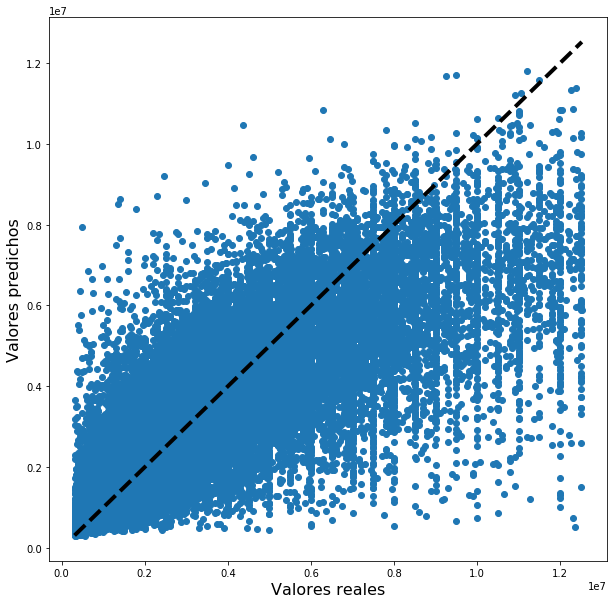

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

### Se puede ver que el modelo es bastante conservador en el sentido de que casi nunca predice valores muy altos, por lo que se observa un alejamiento respecto la diagonal ideal a medida que los precios reales aumentan

## Se prueba dolarizar los precios para entrenar

In [ ]:
train = pd.read_csv("data/train_limpio.csv")
test = pd.read_csv("data/test_limpio.csv")

In [ ]:
train = dolarizar(train)

In [ ]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

In [ ]:
X, y = train.drop(["precio"], axis=1),train["precio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = XGBRegressor()
y_train = np.log(y_train)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [ ]:
pred = desdolarizar(X_test, pred)

####  TODO: Revisar este error, puede ser que no se esten modificando bien las cosas y por eso la falta de difierencia

In [ ]:
y_test = desdolarizar(X_test, y_test)

## Como se puede ver se obtienen resultados casi similares que sin dolarizar los precios

In [ ]:
mean_absolute_error(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

## Probamos en cambio agregar la cotizacion del dolar para ese dia como un feature:

In [ ]:
train = pd.read_csv("data/train_limpio.csv")
test = pd.read_csv("data/test_limpio.csv")

In [ ]:
train_d = agregar_dolar_como_feature(train)
test_d = agregar_dolar_como_feature(test)

In [ ]:
train_d = reduce_mem_usage(train_d)
test_d = reduce_mem_usage(test_d)

In [ ]:
X, y = train_d.drop(["precio"], axis=1),train_d["precio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = XGBRegressor(objective ='reg:squarederror')
y_train = np.log(y_train)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [ ]:
mean_absolute_error(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

## Veamos que pasa aplicando log a los metros cuadrados y tuneando un poco:

In [ ]:
train = pd.read_csv("data/train_limpio.csv")
test = pd.read_csv("data/test_limpio.csv")

In [ ]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

In [ ]:
train["metroscubiertos"] = np.log(train["metroscubiertos"])
train["metrostotales"] = np.log(train["metrostotales"])

test["metroscubiertos"] = np.log(test["metroscubiertos"])
test["metrostotales"] = np.log(test["metrostotales"])

In [ ]:
X, y = train.drop(["precio"], axis=1),train["precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = XGBRegressor(max_depth=15, min_child_weight=0.01)
y_train = np.log(y_train)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [ ]:
mean_absolute_error(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

### Cambiar los parametros aunque sea medio a ojo mejoro muchisimo los resultados, aproximadamente 100k de mejora

---

## Agregamos la poblacion de cada ciudad como feature y probamos algunos valores distintos para XGBoost

In [3]:
train = pd.read_csv("data/train_limpio.csv")
test = pd.read_csv("data/test_limpio.csv")

In [4]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

In [5]:
train_origi = pd.read_csv("data/train.csv")

test_origi = pd.read_csv("data/test.csv")

poblaciones = pd.read_csv("data/poblacion_de_cada_ciudad.csv")

poblaciones_t = pd.read_csv("data/poblacion_de_cada_ciudad_en_el_test.csv")

d_poblaciones = poblaciones.set_index("ciudad")["poblacion"].to_dict()

d_poblaciones_t = poblaciones_t.set_index("ciudad")["poblacion"].to_dict()

train_origi["ciudad"].fillna(train_origi['ciudad'].mode()[0], inplace=True)

test_origi["ciudad"].fillna(test_origi['ciudad'].mode()[0], inplace=True)

train_origi["pob_ciu"] = train_origi.apply(lambda x: d_poblaciones[x["ciudad"]], axis=1)

test_origi["pob_ciu"] = test_origi.apply(lambda x: d_poblaciones_t[x["ciudad"]], axis=1)

train["pob_ciu"] = train_origi["pob_ciu"]

test["pob_ciu"] = test_origi["pob_ciu"]

In [ ]:
X, y = train.drop(["precio"], axis=1),train["precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = XGBRegressor(max_depth=15, min_child_weight=0.01)
y_train = np.log(y_train)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [ ]:
mean_absolute_error(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

## Nuevamente obtenemos un gran cambio, se obtiene una mejora de 60k logrando bajar de los 600k 

In [6]:
stop_w = {s:0 for s in get_stop_words("es")}

In [7]:
train_origi = pd.read_csv("data/train.csv", usecols=["descripcion"])

### Las descripciones tienen tags HTML y algunos caracteres mal formateados, usamos bs para limpar las descripciones

In [8]:
train_origi = train_origi.fillna("")

In [9]:
train_origi["descripcion"] = train_origi.apply(lambda x: BeautifulSoup(x["descripcion"], "lxml").text, axis=1)

/home/julian/.local/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/julian/.local/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [10]:
hasher = FeatureHasher(n_features=200, input_type='string')

In [11]:
vectorized = hasher.transform(map(lambda x: x.split(), train_origi["descripcion"]))

In [12]:
descrip_vect = pd.DataFrame(vectorized.todense(), columns=[f"fh{n}" for n in range(200)])

In [13]:
train = pd.concat([train, descrip_vect], axis=1)

In [28]:
X, y = train.drop(["precio"], axis=1),train["precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
reg = RandomForestRegressor(n_estimators=100, n_jobs=-1)
y_train = np.log(y_train)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [16]:
mean_absolute_error(y_test, pred)

614158.7136278658

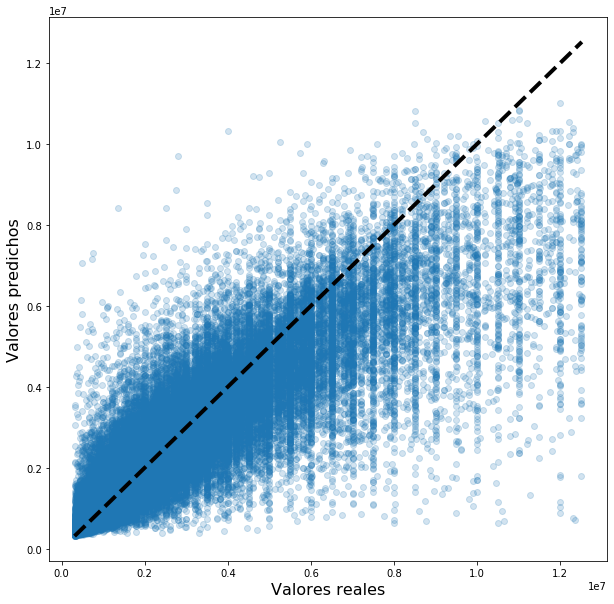

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred, alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

In [24]:
np.array(y_test)

array([3250000, 2700000, 8800000, ..., 3000000, 4500000, 3700000],
      dtype=uint32)

In [35]:
y_test.iloc[0]

3250000

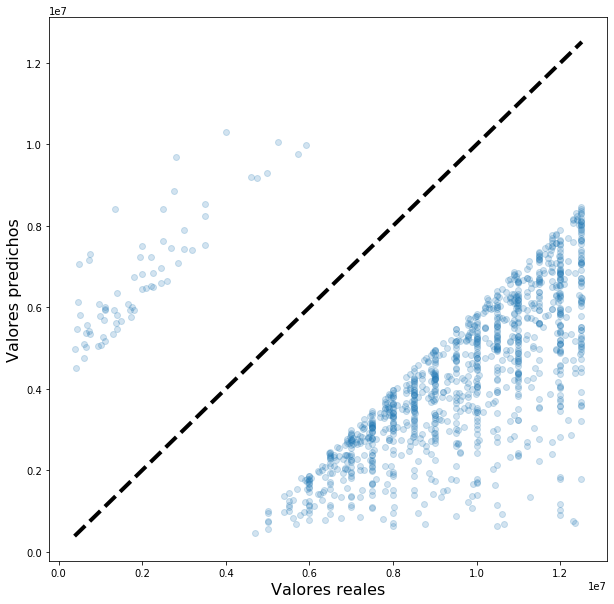

In [27]:
y_test = np.array(y_test)

predicciones = []
reales = []

for i in range(len(pred)):
    if abs(pred[i] - y_test[i]) > 4000000:
        predicciones.append(pred[i])
        reales.append(y_test[i])
        
        
reales = np.array(reales)
predicciones = np.array(predicciones)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(reales, predicciones, alpha=0.2)
ax.plot([reales.min(), reales.max()], [reales.min(), reales.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

In [36]:
indices = []

for i in range(len(pred)):
    if abs(pred[i] - y_test.iloc[i]) > 4000000:
        indices.append(i)

In [40]:
y_test.iloc[indices].index

Int64Index([176393,  45143,  26131,   1116, 161975,  20514,  20084,  89877,
            196181, 179744,
            ...
            122025, 198757,  42555, 122521,   4730,  13109,  66878,  18987,
            160491,  58357],
           dtype='int64', length=1163)

In [45]:
train_origi = pd.read_csv("data/train.csv", usecols=["descripcion"])

In [46]:
train_origi.loc[y_test.iloc[indices].index]

,descripcion
176393,"edificio de 180 m , 2 locales comerciales 4 pi..."
45143,se encuentra en una calle tranquila y cerrada ...
26131,venta terreno con casa en acueducto de guadalu...
1116,"estilo moderno, tiene roof garden 194.46 m2."
161975,"planta baja: cocina, comedor, sala, terraza, j..."
...,...
13109,vendo inmueble con 320 m2 de terreno y 620m2 d...
66878,"<p>edificio de 3 niveles, 992 m2 de construcci..."
18987,precioso departamento en venta ubicado en zona...
160491,hermosa casa bien diseñada y con excelentes ac...


---

In [14]:
test_origi = pd.read_csv("data/test.csv", usecols=["descripcion"])
test_origi = test_origi.fillna("")
test_origi["descripcion"] = test_origi.apply(lambda x: BeautifulSoup(x["descripcion"], "lxml").text, axis=1)
vectorized = hasher.transform(map(lambda x: x.split(), test_origi["descripcion"]))
descrip_vect = pd.DataFrame(vectorized.todense(), columns=[f"fh{n}" for n in range(200)])
test = pd.concat([test, descrip_vect], axis=1)
X, y = train.drop(["precio"], axis=1),train["precio"]
generar_submit(X, y, XGBRegressor, test, "pruebaTHT-XGB", max_depth=15, min_child_weight=0.01)

/home/julian/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
